## Teste de Hipóteses

### Bibliotecas

In [1]:
# Libs
import math as mt
import numpy as np
from scipy.stats import norm

### Base de Dados

In [2]:
# Dados
dados_originais = np.array(
    [
        126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
        140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
        147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
        150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
        154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
        157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
        161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
        164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
        168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
        171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
        178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189.,
        192.5
    ]
)

In [3]:
# Hipótese nula e média
H0_media = np.mean(dados_originais)
H0_media

159.25

In [4]:
# Hipótese nula e desvio padrão
H0_dp = np.std(dados_originais)
H0_dp

13.65

In [5]:
# Gerando novos dados
dados_novos = dados_originais * 1.03
dados_novos

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [6]:
# Média da hipótese alternativa
H1_media = np.mean(dados_novos)
H1_media

164.0275

In [7]:
# desvio padrão da hipótese alternativa
H1_dp = np.std(dados_novos)
H1_dp

14.0595

In [8]:
# Quantidade de elementos
H1_n = len(dados_novos)
H1_n

100

In [9]:
# Nível de confiança 
alpha = 0.05

### Teste de Hipótese Z

#### Teste Manual

In [10]:
# Variável Z
Z = (H1_media - H0_media) / (H1_dp / mt.sqrt(H1_n))
Z

3.398058252427187

In [11]:
# Visualizando a probabilidade
norm.cdf(Z), norm.ppf(0.9996606701617486)

(0.9996606701617486, 3.3980582524271936)

In [12]:
# Refazendo a variável Z
Z = norm.cdf(Z)
Z

0.9996606701617486

In [13]:
# Valor p
p = 1 - Z
p

0.00033932983825135654

In [14]:
# Verificando qual hipótese foi rejeitada 
if p < alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


### Teste com o statsmodels
- https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.ztest.html

#### Biblioteca

In [15]:
# Libs
from statsmodels.stats.weightstats import ztest

In [16]:
# Teste Z
_, p = ztest(
    dados_originais, dados_novos,
    value=H1_media - H0_media,
    alternative='larger'
)

In [17]:
# Visualizando o valor de p
p

0.9999993877283934

### Teste qui quadrado
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

#### Biblioteca

In [18]:
# Lib
from scipy.stats import chi2_contingency

In [19]:
# Tabela de Dados
# tabela = np.array([[30, 20], [22, 28]])
tabela = np.array([[45, 5], [5, 45]])

In [20]:
# Tamanho 
tabela.shape

(2, 2)

In [21]:
# valor de p
_, p, _, _ = chi2_contingency(tabela)
p

6.190717543917382e-15

In [22]:
# Testando a Hipótese
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


### Seleção de atributos com testes de hipóteses - univariate SelectFdr
Testes estatísticos univariados são aqueles que envolvem uma variável dependente, por exemplo, teste t ou teste z para comparação de médias

- Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr

- False discovery rate: https://en.wikipedia.org/wiki/False_discovery_rate

Proporção esperada de erros do tipo I. Um erro do tipo I é quando a hipótese nula é rejeitada incorretamente, ou seja, é obtido um falso positivo

- Erro I: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/type-i-error-type-ii-error-decision/

#### Bibliotecas

In [23]:
# Lib
import pandas as pd
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#### Base de Dados

In [24]:
# Dados
ds = pd.read_csv('./data/ad.data', header=None)
ds.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [25]:
# Tamanho 
ds.shape

(3279, 1559)

In [26]:
# Dividindo em previsores e classes
X = ds.iloc[:, 0:1558].values
y = ds.iloc[:, 1558].values
y

array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
      dtype=object)

In [27]:
# Contando os valores únicos
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 459, 2820], dtype=int64))

#### Sem seleção de Atributos

In [28]:
# Criando e Treinado o modelo
naive1 = GaussianNB()
naive1.fit(X, y)
previsoes1 = naive1.predict(X)
accuracy_score(y, previsoes1)

0.7813357731015553

#### Seleção de atributos com Qui Quadrado

In [29]:
# Criando nova seleção
selecao = SelectFdr(chi2, alpha=0.01)
X_novo = selecao.fit_transform(X, y)

In [30]:
# Tamanho
X.shape, X_novo.shape

((3279, 1558), (3279, 433))

In [31]:
# Valor de p
selecao.pvalues_, len(selecao.pvalues_)

(array([2.14710304e-268, 0.00000000e+000, 8.98165813e-150, ...,
        6.03353380e-041, 5.63437216e-012, 9.37945775e-002]),
 1558)

In [32]:
# Seleção de valores menores ou igual ao alpha
np.sum(selecao.pvalues_ <= 0.01)

476

In [33]:
# Visualizando os valores 
colunas = selecao.get_support()
colunas

array([ True,  True,  True, ...,  True,  True, False])

In [34]:
# Selecionado as coluna com valores True
indices = np.where(colunas == True)
indices

(array([   0,    1,    2,    9,   11,   14,   20,   21,   26,   31,   34,
          36,   49,   58,   59,   64,   65,   69,   70,   86,   91,   95,
          96,  102,  104,  106,  113,  133,  134,  139,  155,  158,  163,
         167,  172,  175,  180,  181,  183,  185,  186,  189,  190,  192,
         193,  224,  242,  246,  248,  249,  251,  259,  264,  265,  266,
         267,  268,  269,  270,  274,  276,  278,  287,  290,  293,  304,
         307,  310,  312,  317,  321,  329,  330,  336,  341,  345,  346,
         350,  351,  355,  356,  357,  359,  366,  367,  370,  372,  381,
         386,  388,  389,  398,  405,  418,  420,  426,  427,  429,  430,
         432,  435,  440,  455,  457,  460,  465,  470,  472,  477,  478,
         482,  508,  511,  518,  528,  532,  533,  540,  542,  548,  551,
         556,  572,  573,  574,  576,  586,  622,  625,  627,  638,  643,
         648,  653,  658,  661,  663,  666,  683,  688,  694,  703,  704,
         709,  711,  720,  723,  729, 

In [35]:
# Criando e Treinado o novo modelo com a seleção
naive2 = GaussianNB()
naive2.fit(X_novo, y)
previsoes2 = naive2.predict(X_novo)
accuracy_score(y, previsoes2)

0.970722781335773

### Anova

#### Dados

In [36]:
# Dados
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

#### Biblioteca

In [37]:
# Lib
from scipy.stats import f

In [38]:
# valor de F crítico
f.ppf(1 - 0.05, dfn=2, dfd=12)

3.8852938346523946

#### Bibliotecas

In [39]:
# Lib
from scipy.stats import f_oneway

In [40]:
# Valor de P
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

0.7613994386091956

In [41]:
# Teste de Hipótese
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

Hipótese alternativa rejeitada


#### Teste de Tukey

In [42]:
# Dados
dados = {
    'valores': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
    'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
}

In [43]:
# Novos dados 
dados = {
    'valores': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
    'grupo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']
}

In [44]:
# Transformando os dados
ds_pd = pd.DataFrame(dados)
ds_pd.head()

,valores,grupo
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A


#### Biblioteca

In [45]:
# Lib
from statsmodels.stats.multicomp import MultiComparison

In [46]:
# Criando uma variável para armazenar a comparação 
compara_grupos = MultiComparison(ds_pd['valores'], ds_pd['grupo'])

In [47]:
# Visualizando o teste
teste = compara_grupos.tukeyhsd()
print(teste)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B     90.0    0.0  58.4785 121.5215   True
     A      C     94.0    0.0  62.4785 125.5215   True
     B      C      4.0 0.9391 -27.5215  35.5215  False
------------------------------------------------------


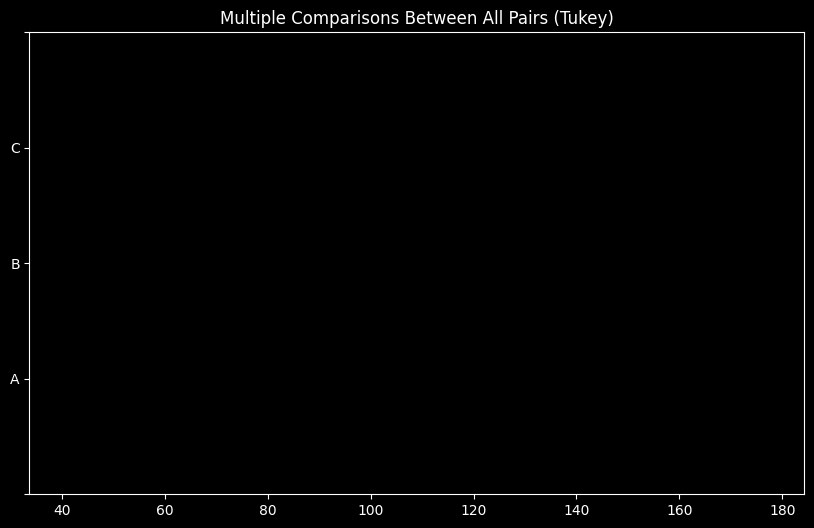

In [48]:
# Gráfico
teste.plot_simultaneous();

### Seleção de atributos com ANOVA

#### Biblioteca

In [49]:
# Lib
from sklearn.feature_selection import SelectFdr, f_classif

In [50]:
# Selecionado
selecao = SelectFdr(f_classif, alpha = 0.01)
X_novo_2 = selecao.fit_transform(X, y)

In [51]:
# Tamanho
X.shape, X_novo.shape, X_novo_2.shape

((3279, 1558), (3279, 433), (3279, 433))

In [52]:
# Valor de P
selecao.pvalues_

array([1.31095977e-005, 1.19510994e-200, 4.91337302e-016, ...,
       1.35872010e-042, 3.77636040e-012, 9.35989125e-002])

In [53]:
# Selecionado valores menor que alpha
np.sum(selecao.pvalues_ < 0.01)

476

In [54]:
# Treinado o modelo
naive3 = GaussianNB()
naive3.fit(X_novo_2, y)
previsoes3 = naive3.predict(X_novo_2)
accuracy_score(y, previsoes3)

0.970722781335773

### Resultados dos algoritmos de Machine Learning

#### Bibliotecas

In [55]:
# Libs
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [56]:
# Base de Dados
df = pd.read_csv('../Labs/Amostragem/credit_data.csv')
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [57]:
# Valores nulos
df.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [58]:
# Média de idade
idade = df['age'].mean()
idade = round(idade, 6)
idade

40.807559

In [59]:
# Substituindo valores nulos 
df['age'] = df['age'].fillna(idade)
# Valores nulos
df.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

In [60]:
# Valores de Previsão e classe
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4].values
# Valores mínimo e máximo
min(X[0]), max(X[0])

(59.0170150669292, 66155.9250950813)

#### Padronizando os Dados

In [61]:
# Lib e método
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Valores mínimo e máximo
min(X[0]), max(X[0])

(1.2028194204846914, 1.4539339314851303)

In [62]:
# Realizando o teste do modelo 30 vezes
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    naive_bayes = GaussianNB()
    scores = cross_val_score(naive_bayes, X, y, cv = kfold)
    resultados_naive_cv.append(scores.mean())

    logistica = LogisticRegression()
    scores = cross_val_score(logistica, X, y, cv = kfold)
    resultados_logistica_cv.append(scores.mean())  
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv = kfold)
    resultados_forest_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)

In [63]:
# A média dos trés resultados
resultados_naive_cv.mean(), resultados_logistica_cv.mean(), resultados_forest_cv.mean()

(0.9250166666666667, 0.9454999999999999, 0.9869500000000001)

#### Teste de hipótese de Shapiro-Wilk
- https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

In [64]:
# Valor de alpha
alpha = 0.05

In [65]:
# Lib e teste 
from scipy.stats import shapiro
shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv)

(ShapiroResult(statistic=0.9446430206298828, pvalue=0.12133526057004929),
 ShapiroResult(statistic=0.887016773223877, pvalue=0.004102450329810381),
 ShapiroResult(statistic=0.9334708452224731, pvalue=0.06075560674071312))

#### Gráficos

In [66]:
# Lib
import seaborn as sns

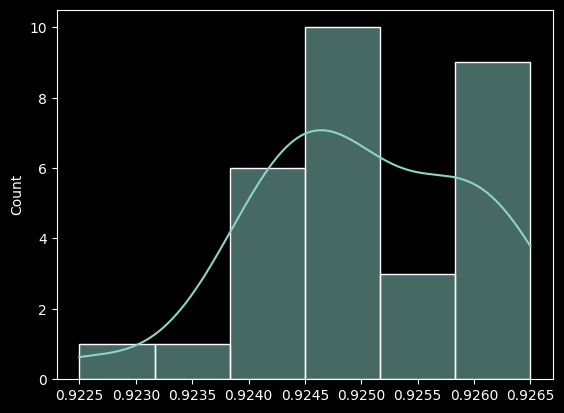

In [67]:
# Gráfico
sns.histplot(resultados_naive_cv, kde=True);

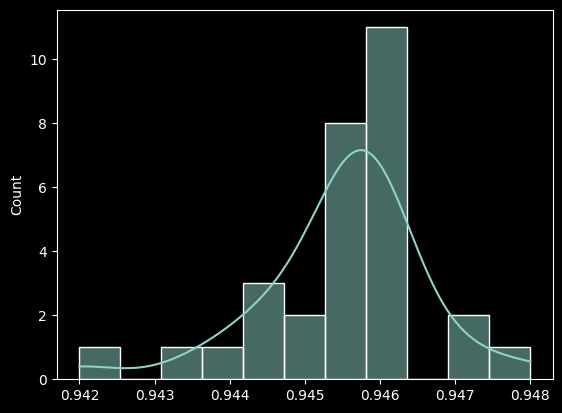

In [68]:
# Gráfico
sns.histplot(resultados_logistica_cv, kde=True);

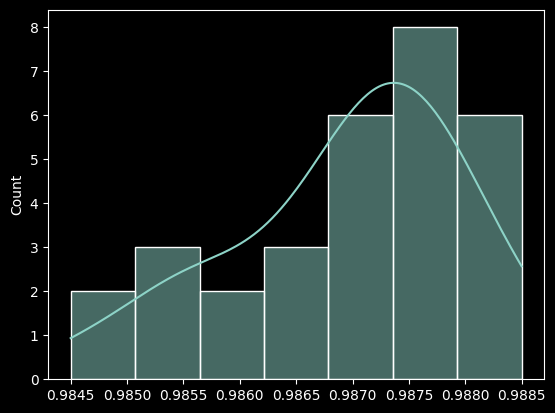

In [69]:
# Gráfico
sns.histplot(resultados_forest_cv, kde=True);

#### Teste de hipótese de D'Agostinho K^2
- https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test

In [70]:
# Lib e teste
from scipy.stats import normaltest
normaltest(resultados_naive_cv), normaltest(resultados_logistica_cv), normaltest(resultados_forest_cv)

(NormaltestResult(statistic=0.7385679479854061, pvalue=0.691229091491905),
 NormaltestResult(statistic=10.180370628533243, pvalue=0.006156878823960576),
 NormaltestResult(statistic=2.671557827923343, pvalue=0.2629532776882634))

#### Teste de hipótese de Anderson-Darling
- https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

In [71]:
from scipy.stats import anderson
anderson(resultados_naive_cv).statistic, anderson(resultados_logistica_cv).statistic, anderson(resultados_forest_cv).statistic

(0.6137367855362434, 1.4901425666517376, 0.8255056732902304)

#### Testes não paramétricos
- https://www.statisticshowto.com/parametric-and-non-parametric-data/#:~:text=Nonparametric%20tests%20can%20perform%20well,20%20items%20in%20each%20group).  
If at all possible, you should us parametric tests, as they tend to be more accurate. Parametric tests have greater statistical power, which means they are likely to find a true significant effect. Use nonparametric tests only if you have to (i.e. you know that assumptions like normality are being violated). Nonparametric tests can perform well with non-normal continuous data if you have a sufficiently large sample size (generally 15-20 items in each group).

#### Teste de Wilcoxon Signed-Rank
- https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

In [72]:
# Lib e o teste
from scipy.stats import wilcoxon
_, p = wilcoxon(resultados_naive_cv, resultados_logistica_cv)
p

1.862645149230957e-09

In [73]:
# Teste
_, p = wilcoxon(resultados_naive_cv, resultados_forest_cv)
p

1.862645149230957e-09

In [74]:
# Teste
_, p = wilcoxon(resultados_logistica_cv, resultados_forest_cv)
p

1.862645149230957e-09

#### Teste de Friedman
- https://en.wikipedia.org/wiki/Friedman_test
- Teste de Nemenyi: https://en.wikipedia.org/wiki/Nemenyi_test

In [75]:
# Lib e teste
from scipy.stats import friedmanchisquare
_, p = friedmanchisquare(
    resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv
)
p

9.357622968840163e-14